<a href="https://colab.research.google.com/github/oscardaum/gamejam1/blob/master/Oscar_Daum_Launch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Hi! and welcome to my data set notebook. I am fairly new to data science and apologize if I do not accomodate to common practice. That being said, I learned a lot from this assignement and dedicated a lot of work/research into mapping and obtaining the data. I have included sections that weren't in the final project to display my full ability to learn content. Please read the headers and their accompanied descriptions for analysis. Two parts in this notebook don't run; however they are not important to the project and I left them in to show my thought process. I really loved learning from this assignment and would love to continue learning with the group at HackCVille. Again, thank you for looking this notebook over.

Developed by: Oscar Daum <br />
For: Launch Application/Presentation<br />
Date: 10/21/2017<br />
Email: od6vh@virginia.edu

# Data Set

#Approval 

This Section includes three charts that map the approval ratings for trump over time as well as their frequencies.

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib import rcParams
import io

In [0]:
popularity = pd.read_csv('https://query.data.world/s/ruxm24l4ld6m644im6o62wrqzt3o6a')
popularity.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,4/13/2018,1/20/2017,1/22/2017,Morning Consult,NaN,1992,rv,0.798422,0.0,46.0,37.0,42.21091,39.95599,NaN,NaN,http://www.politico.com/story/2017/01/poll-vot...,49249,77261,1/23/2017,09:37:29 13 Apr 2018
1,Donald Trump,All polls,4/13/2018,1/20/2017,1/22/2017,Gallup,B-,1500,a,0.229544,0.0,45.0,45.0,46.24121,42.99906,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:37:29 13 Apr 2018
2,Donald Trump,All polls,4/13/2018,1/20/2017,1/24/2017,Ipsos,A-,1632,a,0.287416,0.0,42.1,45.2,42.42347,43.99974,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,09:37:29 13 Apr 2018
3,Donald Trump,All polls,4/13/2018,1/21/2017,1/23/2017,Gallup,B-,1500,a,0.211740,0.0,45.0,46.0,46.24121,43.99906,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:37:29 13 Apr 2018
4,Donald Trump,All polls,4/13/2018,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,0.205238,0.0,57.0,43.0,51.92075,43.21756,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,09:37:29 13 Apr 2018


In [0]:
popularity.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

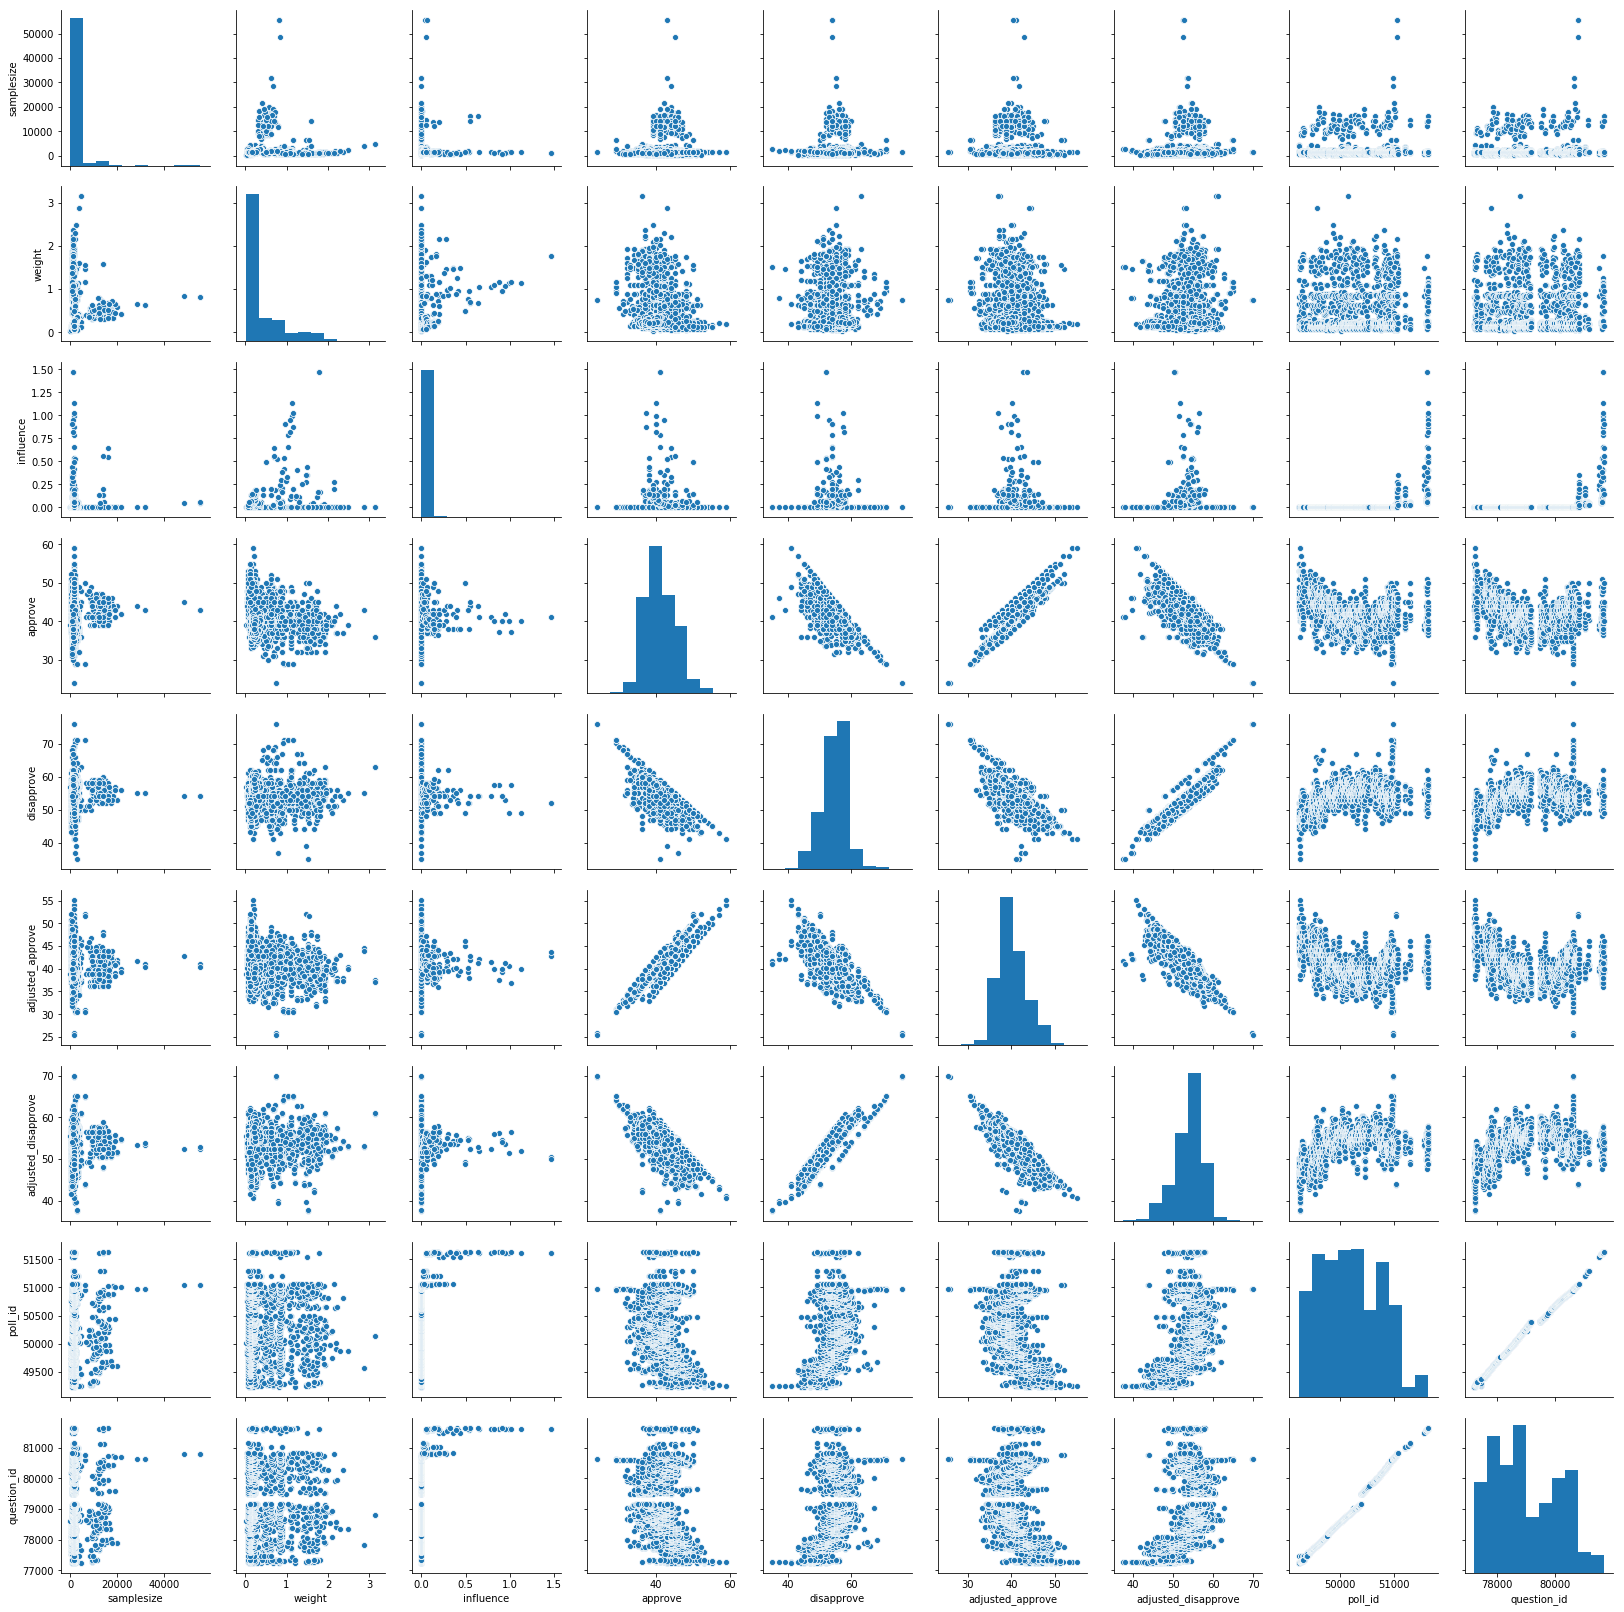

In [0]:
sns.pairplot(popularity)    # looking for trends

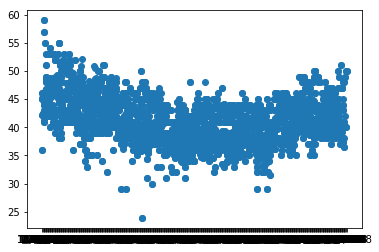

In [0]:
plt.scatter(popularity.startdate, popularity.approve)   # crude popularity over time

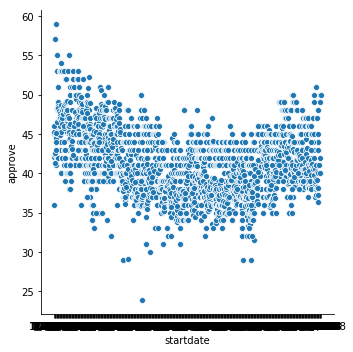

In [0]:
sns.relplot(x = 'startdate', y = 'approve', data = popularity)  # same as above just in seaborn

## Cleaning

In [0]:
to_drop = ['subgroup',          # remove unecessary columns to make data more clear
            'modeldate',
            'pollster',
            'samplesize',
            'question_id',
            'timestamp',
            'multiversions',
            'poll_id',
            'url',
            'tracking',
            'president',
            'influence']

popularity.drop(to_drop, 1, inplace=True)
popularity.head()


,startdate,enddate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,1/20/2017,1/22/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1,1/20/2017,1/22/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2,1/20/2017,1/24/2017,A-,a,0.287416,42.1,45.2,42.42347,43.99974,3/1/2017
3,1/21/2017,1/23/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
4,1/22/2017,1/24/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


## approval distribution

In [0]:
df = popularity     # create new dataframe from popularity
df.columns
df.head()

,startdate,enddate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,1/20/2017,1/22/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1,1/20/2017,1/22/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2,1/20/2017,1/24/2017,A-,a,0.287416,42.1,45.2,42.42347,43.99974,3/1/2017
3,1/21/2017,1/23/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
4,1/22/2017,1/24/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


In [0]:

df["approve"] = (df["approve"]//1)        # truncates values so they are easier to group
df["approve"]



0       46.0
1       45.0
2       42.0
3       45.0
4       57.0
5       42.0
6       36.0
7       46.0
8       41.0
9       42.0
10      46.0
11      59.0
12      44.0
13      55.0
14      45.0
15      44.0
16      45.0
17      42.0
18      49.0
19      48.0
20      42.0
21      53.0
22      43.0
23      48.0
24      51.0
25      46.0
26      43.0
27      45.0
28      42.0
29      45.0
        ... 
3815    44.0
3816    40.0
3817    44.0
3818    39.0
3819    50.0
3820    40.0
3821    42.0
3822    49.0
3823    45.0
3824    40.0
3825    41.0
3826    51.0
3827    39.0
3828    39.0
3829    47.0
3830    40.0
3831    47.0
3832    39.0
3833    38.0
3834    43.0
3835    48.0
3836    40.0
3837    48.0
3838    45.0
3839    41.0
3840    49.0
3841    42.0
3842    50.0
3843    40.0
3844    50.0
Name: approve, Length: 3845, dtype: float64

In [0]:
df.approve.value_counts       # counts frequency of specific approval rates

<bound method IndexOpsMixin.value_counts of 0       46.0
1       45.0
2       42.0
3       45.0
4       57.0
5       42.0
6       36.0
7       46.0
8       41.0
9       42.0
10      46.0
11      59.0
12      44.0
13      55.0
14      45.0
15      44.0
16      45.0
17      42.0
18      49.0
19      48.0
20      42.0
21      53.0
22      43.0
23      48.0
24      51.0
25      46.0
26      43.0
27      45.0
28      42.0
29      45.0
        ... 
3815    44.0
3816    40.0
3817    44.0
3818    39.0
3819    50.0
3820    40.0
3821    42.0
3822    49.0
3823    45.0
3824    40.0
3825    41.0
3826    51.0
3827    39.0
3828    39.0
3829    47.0
3830    40.0
3831    47.0
3832    39.0
3833    38.0
3834    43.0
3835    48.0
3836    40.0
3837    48.0
3838    45.0
3839    41.0
3840    49.0
3841    42.0
3842    50.0
3843    40.0
3844    50.0
Name: approve, Length: 3845, dtype: float64>

In [0]:
approval = df.approve.value_counts()
approval

38.0    368
37.0    367
39.0    359
40.0    314
43.0    292
41.0    285
42.0    278
36.0    274
44.0    249
45.0    223
35.0    160
46.0    148
47.0    122
48.0    106
34.0     83
49.0     52
50.0     35
33.0     29
53.0     20
51.0     18
32.0     16
52.0     15
31.0      8
29.0      8
55.0      6
54.0      2
59.0      2
23.0      2
57.0      2
30.0      2
Name: approve, dtype: int64

In [0]:
df = pd.DataFrame(approval)   # creates a dataframe with index as rating and has values of frequency
df = df.reset_index().sort_values(by='index', ascending=True).set_index('index')
df.head()

,approve
index,
23.0,2
29.0,8
30.0,2
31.0,8
32.0,16


Text(0, 0.5, 'Frequency')

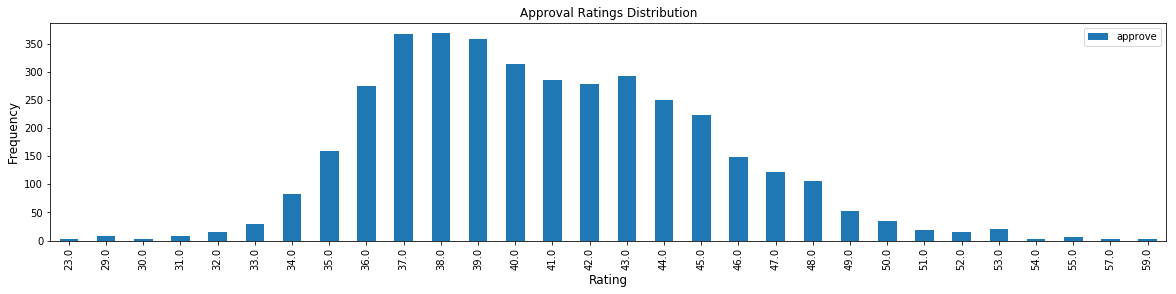

In [0]:
df.plot(kind = 'bar', figsize = (20,4), title= "Approval Ratings Distribution")  # displays distribution of approval ratings
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


##Approval Over Time

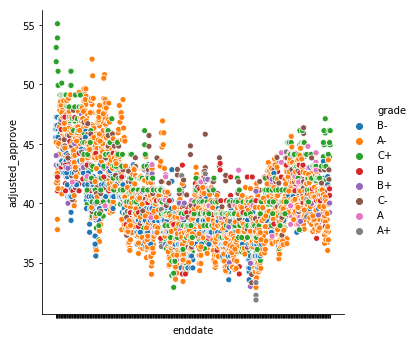

In [0]:
# general chart that shows approval over time with a color dependent on grade scored
BACKUP = pd.read_csv('https://query.data.world/s/ruxm24l4ld6m644im6o62wrqzt3o6a')
g=sns.relplot(x = 'enddate', y = 'adjusted_approve', hue = 'grade', data = BACKUP)
g.set(xticklabels=[])

In [0]:
df2 = pd.DataFrame(popularity)    # turns popularity into a data frame "df2"
df2.head()

,startdate,enddate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,1/20/2017,1/22/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1,1/20/2017,1/22/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2,1/20/2017,1/24/2017,A-,a,0.287416,42.0,45.2,42.42347,43.99974,3/1/2017
3,1/21/2017,1/23/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
4,1/22/2017,1/24/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


In [0]:
ts = df2.set_index('enddate')   # creates a dataframe ts using enddate as index
ts.head()

,startdate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
enddate,,,,,,,,,
1/22/2017,1/20/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1/22/2017,1/20/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
1/24/2017,1/20/2017,A-,a,0.287416,42.0,45.2,42.42347,43.99974,3/1/2017
1/23/2017,1/21/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
1/24/2017,1/22/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


I want to make it into bins so I can effectively show the dates but I dont know how to, and all my attempts at research were fruitless

In [0]:
bins = ["1/17", "2/17", "3/17", "4/17", "5/17", "6/17", "7/17", 
        "8/17", "9/17", "10/17", "11/17", "12/17", "1/18", "2/18",
        "3/18", "4/18"]

for x in range (16):    # attempting to bin them based on month/year
  pass

In [0]:
popularity.head()

,startdate,enddate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,1/20/2017,1/22/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1,1/20/2017,1/22/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2,1/20/2017,1/24/2017,A-,a,0.287416,42.0,45.2,42.42347,43.99974,3/1/2017
3,1/21/2017,1/23/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
4,1/22/2017,1/24/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).count()



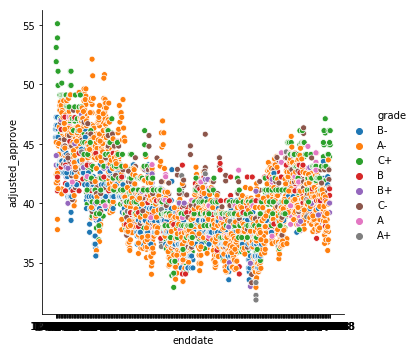

In [0]:
s = pd.date_range('2017-01', '2018-04', freq='30D')  # DatetimeIndex attempt failed
pd.Series(1, index=s).resample('M', how='count')
sns.relplot(x = 'enddate', y = 'adjusted_approve', hue = 'grade', data = popularity)

In [0]:
df2['enddate'] = pd.to_datetime(df2['enddate'])   # cnverts ts to datetime
df2.head()
ts = df2.set_index('enddate')     # sets index of datetime to enddate
ts.head()

df_group = ts.groupby(pd.Grouper(level='enddate', freq='M'))['approve'].agg('mean')   # groups the time data by month andaverages value for that month
df_group.dropna(inplace=True)
df_group = df_group.to_frame().reset_index()
print(df_group)

      enddate    approve
0  2017-01-31  46.053333
1  2017-02-28  45.524000
2  2017-03-31  43.986063
3  2017-04-30  43.242647
4  2017-05-31  41.312268
5  2017-06-30  39.856089
6  2017-07-31  39.459144
7  2017-08-31  37.694352
8  2017-09-30  39.437722
9  2017-10-31  38.368243
10 2017-11-30  38.492481
11 2017-12-31  37.621212
12 2018-01-31  40.707627
13 2018-02-28  42.504630
14 2018-03-31  41.649351
15 2018-04-30  42.301370


Text(0, 0.5, 'Approval Rathings(%)')

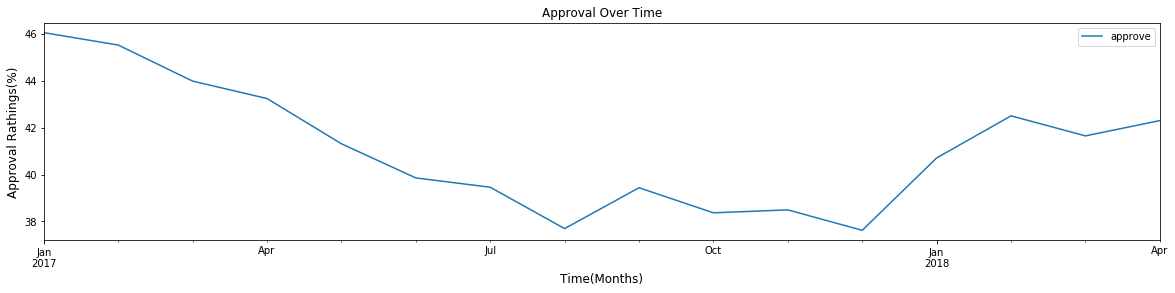

In [0]:
df_group.plot('enddate', 'approve', kind = 'line', figsize = (20,4), title= "Approval Over Time")
plt.xlabel('Time(Months)', fontsize=12)
plt.ylabel('Approval Rathings(%)', fontsize=12)


# Market Analysis

This section includes analysis of the S&P 500 index for general market performance analysis. 

In [0]:
from google.colab import files    # insert the data_csv.csv in the shared folder
uploaded = files.upload()
uploaded

Saving data_csv.csv to data_csv.csv


{'data_csv.csv': b'Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10\r\n1871-01-01,4.44,0.26,0.4,12.46,5.32,89,5.21,8.02,\r\n1871-02-01,4.5,0.26,0.4,12.84,5.32,87.53,5.06,7.78,\r\n1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,\r\n1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,\r\n1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,\r\n1871-06-01,4.82,0.26,0.4,12.08,5.34,99.66,5.38,8.27,\r\n1871-07-01,4.73,0.26,0.4,12.08,5.34,97.8,5.38,8.27,\r\n1871-08-01,4.79,0.26,0.4,11.89,5.34,100.62,5.46,8.4,\r\n1871-09-01,4.84,0.26,0.4,12.18,5.35,99.29,5.33,8.21,\r\n1871-10-01,4.59,0.26,0.4,12.37,5.35,92.71,5.25,8.08,\r\n1871-11-01,4.64,0.26,0.4,12.37,5.35,93.72,5.25,8.08,\r\n1871-12-01,4.74,0.26,0.4,12.65,5.36,93.58,5.13,7.9,\r\n1872-01-01,4.86,0.26,0.4,12.65,5.36,95.95,5.2,7.95,\r\n1872-02-01,4.88,0.27,0.41,12.65,5.38,96.35,5.27,8,\r\n1872-03-01,5.04,0.27,0.41,12.84,5.4,98.03,5.25,7.93,\r\n1872-04-01,5.18,0.27,0.41,13.13,5.

In [0]:
snp_df = pd.read_csv(io.StringIO(uploaded['data_csv.csv'].decode('utf-8')))
snp_df

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
5,1871-06-01,4.82,0.26,0.40,12.08,5.34,99.66,5.38,8.27,NaN
6,1871-07-01,4.73,0.26,0.40,12.08,5.34,97.80,5.38,8.27,NaN
7,1871-08-01,4.79,0.26,0.40,11.89,5.34,100.62,5.46,8.40,NaN
8,1871-09-01,4.84,0.26,0.40,12.18,5.35,99.29,5.33,8.21,NaN
9,1871-10-01,4.59,0.26,0.40,12.37,5.35,92.71,5.25,8.08,NaN


In [0]:
snp_df = snp_df[1752:1767]
snp_df

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
1752,1/1/2017,2275.12,45.93,96.46,242.84,2.43,2340.67,47.25,99.24,28.06
1753,2/1/2017,2329.91,46.15,98.38,243.60,2.42,2389.52,47.33,100.89,28.66
1754,3/1/2017,2366.82,46.38,100.29,243.80,2.48,2425.40,47.53,102.77,29.09
1755,4/1/2017,2359.31,46.66,101.53,244.52,2.30,2410.56,47.67,103.74,28.90
1756,5/1/2017,2395.35,46.94,102.78,244.73,2.30,2445.29,47.92,104.92,29.31
1757,6/1/2017,2433.99,47.22,104.02,244.96,2.19,2482.48,48.16,106.09,29.75
1758,7/1/2017,2454.10,47.54,105.04,244.79,2.32,2504.72,48.52,107.21,30.00
1759,8/1/2017,2456.22,47.85,106.06,245.52,2.21,2499.40,48.69,107.92,29.91
1760,9/1/2017,2492.84,48.17,107.08,246.82,2.20,2523.31,48.76,108.39,30.17
1761,10/1/2017,2557.00,48.42,108.01,246.66,2.36,2589.89,49.05,109.40,30.92


Text(0, 0.5, 'Dollar/Share')

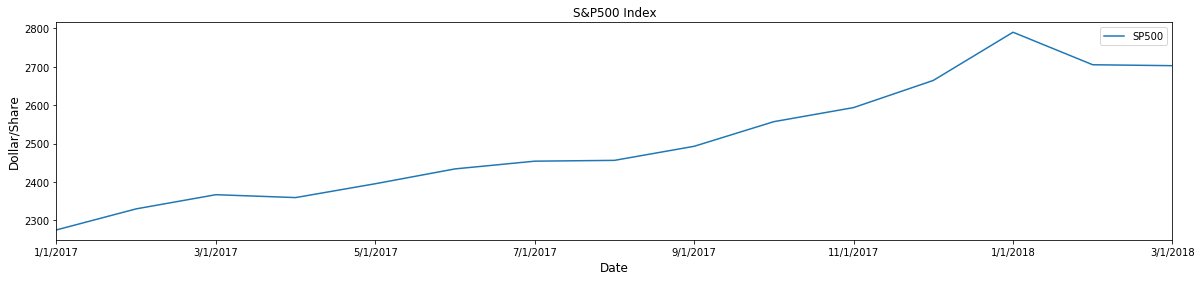

In [0]:
snp_df.plot('Date', 'SP500', kind = 'line', figsize = (20,4), title= "S&P500 Index")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Dollar/Share', fontsize=12)

## Comparison of Market and Approval

In [0]:
disapproval_df = pd.DataFrame(popularity)    # turns popularity into a data frame "df2"
disapproval_df.head()

,startdate,enddate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,1/20/2017,2017-01-22,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
1,1/20/2017,2017-01-22,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2,1/20/2017,2017-01-24,A-,a,0.287416,42.0,45.2,42.42347,43.99974,3/1/2017
3,1/21/2017,2017-01-23,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
4,1/22/2017,2017-01-24,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


In [0]:
disapproval_ts = disapproval_df.set_index('enddate')   # creates a dataframe ts using enddate as index
disapproval_ts.head()

,startdate,grade,population,weight,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
enddate,,,,,,,,,
2017-01-22,1/20/2017,NaN,rv,0.798422,46.0,37.0,42.21091,39.95599,1/23/2017
2017-01-22,1/20/2017,B-,a,0.229544,45.0,45.0,46.24121,42.99906,1/23/2017
2017-01-24,1/20/2017,A-,a,0.287416,42.0,45.2,42.42347,43.99974,3/1/2017
2017-01-23,1/21/2017,B-,a,0.211740,45.0,46.0,46.24121,43.99906,1/24/2017
2017-01-24,1/22/2017,C+,lv,0.205238,57.0,43.0,51.92075,43.21756,1/25/2017


In [0]:
disapproval_df['enddate'] = pd.to_datetime(df2['enddate'])   # converts disapproval to datetime
disapproval_df.head()
disapproval_ts = disapproval_df.set_index('enddate')     # sets index of datetime to enddate
disapproval_ts.head()

df_group2 = ts.groupby(pd.Grouper(level='enddate', freq='M'))['disapprove'].agg('mean')   # groups the time data by month andaverages value for that month
df_group2.dropna(inplace=True)
df_group2 = df_group2.to_frame().reset_index()
print(df_group2)

      enddate  disapprove
0  2017-01-31   45.794667
1  2017-02-28   49.666000
2  2017-03-31   51.051916
3  2017-04-30   52.116544
4  2017-05-31   54.087732
5  2017-06-30   55.915867
6  2017-07-31   56.455642
7  2017-08-31   57.587708
8  2017-09-30   55.431174
9  2017-10-31   57.102703
10 2017-11-30   56.697744
11 2017-12-31   57.646591
12 2018-01-31   55.095932
13 2018-02-28   53.566204
14 2018-03-31   54.168398
15 2018-04-30   53.934247


Text(0, 0.5, 'Dispproval Ratings(%)')

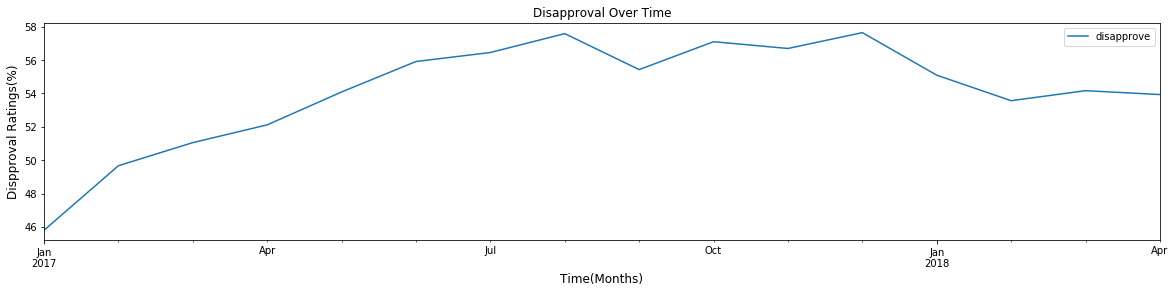

In [0]:
df_group2.plot('enddate', 'disapprove', kind = 'line', figsize = (20,4), title= "Disapproval Over Time")
plt.xlabel('Time(Months)', fontsize=12)
plt.ylabel('Dispproval Ratings(%)', fontsize=12)

Unfortunately, I was unable to allign the axis for this figure; however, I manage to allign them for the presentation.

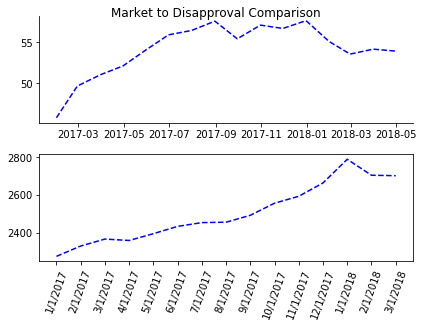

In [0]:
fig, ax = plt.subplots(2) # defaults to one
# spines = borders

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

fig.suptitle("Market to Disapproval Comparison")
fig.tight_layout()

plt.xticks(rotation=70)
#ax.set(title= "Sample ", xLabel="sample x ", yLabel="sample y")
ax[0].plot(df_group2["enddate"],df_group2["disapprove"], "b--")
ax[1].plot(snp_df["Date"],snp_df["SP500"], "b--")

# twitter scraping



In [0]:
!pip install twint nest_asyncio

     |████████████████████████████████| 1.2MB 8.0MB/s 
     |████████████████████████████████| 204kB 44.2MB/s 
     |████████████████████████████████| 92kB 20.6MB/s 
     |████████████████████████████████| 317kB 50.3MB/s 
     |████████████████████████████████| 256kB 53.6MB/s 
     |████████████████████████████████| 204kB 41.2MB/s 
  Created wheel for twint: filename=twint-2.1.6-cp36-none-any.whl size=32281 sha256=a79b16a26d5d18b4d163efda37a540721b6fdbd77d2555653261c520d81bb631
  Stored in directory: /root/.cache/pip/wheels/c6/9f/08/dab05a6a46951e24e0d20dce9f99f7696178d262e5a6cae842
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=13a8175e297a80134c70fe9db965428937e6399b01c73c655b41693d5800fe15
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=9f0400f864c5fb02b91c56db6ed9068c72f2e182bb618d

In [0]:
import re # good for patterns, pretty important. Well use for data cleaning
import twint
import nest_asyncio
import numpy as np
from textblob import TextBlob


nest_asyncio.apply()

In [0]:
config = twint.Config()

config.Search = "Economy"
config.Format = "{tweet}"
config.Limit  = 10
config.Lang = "en"
config.Pandas = True
config.Username = "realDonaldTrump"
config.Since = "2017-1-1"
config.Until = "2018-4-1"
twint.run.Search(config)

JOBS, JOBS, JOBS! Unemployment claims have fallen to a 45-year low. Together, we are making the economy great again!  https://www.bloomberg.com/news/articles/2018-03-29/u-s-jobless-claims-decline-to-lowest-level-since-january-1973 …
The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.
The Economy is raging, at an all time high, and is set to get even better. Jobs and wages up. Vote for Rick Saccone and keep it going!
The U.S. economy is looking very good, in my opinion, even better than anticipated. Companies are pouring back into our country, reversing the long term trend of leaving. The unemployment numbers are looking great, and Regulations & Taxes have been massively Cut! JOBS, JOBS, JOBS
In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market goes down. Big mistake, and we have so much good (gre

In [0]:
df = twint.storage.panda.Tweets_df    # turns into dataframe
df.tail()

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,name,near,nlikes,nreplies,nretweets,place,quote_url,reply_to,retweet,retweet_date,retweet_id,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username
36,[],881979394373406720,1499115248000,2017-07-03 20:54:08,2,,[],22,881979394373406720,https://twitter.com/realDonaldTrump/status/881...,Donald J. Trump,,84967,13301,17177,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,Really great numbers on jobs & the economy! Th...,25073877,25073877,,,realDonaldTrump
37,[],881847676232503297,1499083844000,2017-07-03 12:10:44,3,,[],10,881847676232503297,https://twitter.com/realDonaldTrump/status/881...,Donald J. Trump,,115985,36436,26679,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,At some point the Fake News will be forced to ...,25073877,25073877,,,realDonaldTrump
38,[],874087477807599616,1497233669000,2017-06-12 02:14:29,2,,[],09,874087477807599616,https://twitter.com/realDonaldTrump/status/874...,Donald J. Trump,,79207,18673,16403,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,"Great numbers on the economy. All of our work,...",25073877,25073877,,,realDonaldTrump
39,[],857185261029126144,1493203866000,2017-04-26 10:51:06,2,,[],03,857185261029126144,https://twitter.com/realDonaldTrump/status/857...,Donald J. Trump,,42138,8184,8074,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,The U.S. recorded its slowest economic growth ...,25073877,25073877,,,realDonaldTrump
40,[],839433678275153921,1488971559000,2017-03-08 11:12:39,3,,[],02,839433678275153921,https://twitter.com/realDonaldTrump/status/839...,Donald J. Trump,,109057,39714,19998,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,I have tremendous respect for women and the ma...,25073877,25073877,,,realDonaldTrump


In [0]:
dataset = np.array(df["tweet"])   # makes tweet column into array
dataset[:10]

array(['JOBS, JOBS, JOBS! Unemployment claims have fallen to a 45-year low. Together, we are making the economy great again!  https://www.bloomberg.com/news/articles/2018-03-29/u-s-jobless-claims-decline-to-lowest-level-since-january-1973\xa0…',
       'The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.',
       'The Economy is raging, at an all time high, and is set to get even better. Jobs and wages up. Vote for Rick Saccone and keep it going!',
       'The U.S. economy is looking very good, in my opinion, even better than anticipated. Companies are pouring back into our country, reversing the long term trend of leaving. The unemployment numbers are looking great, and Regulations & Taxes have been massively Cut! JOBS, JOBS, JOBS',
       'In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market go

In [0]:
def clean_tweet(tweet):       # cleans the scraped data so the tweets dont have odd text inputs
 return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
dataset = [clean_tweet(tweet) for tweet in dataset]
dataset

['JOBS JOBS JOBS Unemployment claims have fallen to a 45-year low Together we are making the economy great again …',
 'The economy is looking really good It has been many years that we have seen these kind of numbers The underlying strength of companies has perhaps never been better.',
 'The Economy is raging at an all time high and is set to get even better Jobs and wages up Vote for Rick Saccone and keep it going!',
 'The U.S economy is looking very good in my opinion even better than anticipated Companies are pouring back into our country reversing the long term trend of leaving The unemployment numbers are looking great and Regulations Taxes have been massively Cut JOBS JOBS JOBS',
 'In the “old days, when good news was reported the Stock Market would go up Today when good news is reported the Stock Market goes down Big mistake and we have so much good (great news about the economy!',
 'Our economy is better than it has been in many decades Businesses are coming back to America lik

In [0]:
def get_tweet_sentiment(tweet):   # setiment analysis using Textblob
  blob = TextBlob(tweet)

  if blob.sentiment.polarity > 0:
    return 'positive'
  if blob.sentiment.polarity == 0:
    return 'neutral'
  return 'negative'

tweet_sentiments = [get_tweet_sentiment(tweet) for tweet in dataset]    # performs analysis on all tweets in array
tweet_sentiments[:10]

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']

In [0]:
unique, counts = np.unique(tweet_sentiments, return_counts=True)    # groups analysis into a dictionary
print(dict(zip(unique, counts)))
pos_neg = []
pos_neg.append

{'negative': 4, 'neutral': 3, 'positive': 34}


<function list.append>

## I want to turn this into a function

I wanted to turn this into a function that would create a dataframe for polarity over time but was unable to get it working. Instead, I will use pie charts at various times to compare mentality/activity.

In [0]:
def get_tweet_sentiment(tweet):
  blob = TextBlob(tweet)

  if blob.sentiment.polarity > 0:
    return 'positive'
  if blob.sentiment.polarity == 0:
    return 'neutral'
  return 'negative'

def clean_tweet(tweet):
 return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

def twitter_analysis(start_date= "2017-1-1", end_date= "2018-4-1"):
  config = twint.Config()
  config.Search = "Economy"
  config.Format = "{tweet}"
  config.Limit  = 100
  config.Lang = "en"
  config.Pandas = True
  config.Username = "realDonaldTrump"
  config.Since = start_date
  config.Until = end_date
  twint.run.Search(config)

  df = twint.storage.panda.Tweets_df
  dataset = np.array(df["tweet"])
  
  dataset = [clean_tweet(tweet) for tweet in dataset]


  tweet_sentiments = [get_tweet_sentiment(tweet) for tweet in dataset]
  
  unique, counts = np.unique(tweet_sentiments, return_counts=True)
  print(dict(zip(unique, counts)))
  pos_neg = []
  pos_neg.append

In [0]:
twitter_analysis("2017-1-1","2017-2-1")

KeyError: ignored

#Pie Charts

I am not sure how to do this efficiently so I am going to brute forcibly replicate it.

##Pie Chart 1: 1/17 to 8/17

In [0]:
c = twint.Config()

c.Search = "Economy"
c.Format = "{tweet}"
c.Limit  = 100
c.Lang = "en"
c.Pandas = True
c.Username = "realDonaldTrump"
c.Since = "2017-1-1"
c.Until = "2017-8-1"
twint.run.Search(c)

Really great numbers on jobs & the economy! Things are starting to kick in now, and we have just begun! Don't like steel & aluminum dumping!
At some point the Fake News will be forced to discuss our great jobs numbers, strong economy, success with ISIS, the border & so much else!
Great numbers on the economy. All of our work, including the passage of many bills & regulation killing Executive Orders, now kicking in!
The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.
I have tremendous respect for women and the many roles they serve that are vital to the fabric of our society and our economy.


In [0]:
df_1 = twint.storage.panda.Tweets_df
df_1.tail()

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,name,near,nlikes,nreplies,nretweets,place,quote_url,reply_to,retweet,retweet_date,retweet_id,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username
0,[],881979394373406720,1499115248000,2017-07-03 20:54:08,2,,[],22,881979394373406720,https://twitter.com/realDonaldTrump/status/881...,Donald J. Trump,,84968,13301,17177,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,Really great numbers on jobs & the economy! Th...,25073877,25073877,,,realDonaldTrump
1,[],881847676232503297,1499083844000,2017-07-03 12:10:44,3,,[],10,881847676232503297,https://twitter.com/realDonaldTrump/status/881...,Donald J. Trump,,115985,36436,26678,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,At some point the Fake News will be forced to ...,25073877,25073877,,,realDonaldTrump
2,[],874087477807599616,1497233669000,2017-06-12 02:14:29,2,,[],09,874087477807599616,https://twitter.com/realDonaldTrump/status/874...,Donald J. Trump,,79208,18672,16403,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,"Great numbers on the economy. All of our work,...",25073877,25073877,,,realDonaldTrump
3,[],857185261029126144,1493203866000,2017-04-26 10:51:06,2,,[],03,857185261029126144,https://twitter.com/realDonaldTrump/status/857...,Donald J. Trump,,42137,8184,8074,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,The U.S. recorded its slowest economic growth ...,25073877,25073877,,,realDonaldTrump
4,[],839433678275153921,1488971559000,2017-03-08 11:12:39,3,,[],02,839433678275153921,https://twitter.com/realDonaldTrump/status/839...,Donald J. Trump,,109057,39714,19997,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,I have tremendous respect for women and the ma...,25073877,25073877,,,realDonaldTrump


In [0]:
dataset = np.array(df_1["tweet"])
dataset[:10]

array(["Really great numbers on jobs & the economy! Things are starting to kick in now, and we have just begun! Don't like steel & aluminum dumping!",
       'At some point the Fake News will be forced to discuss our great jobs numbers, strong economy, success with ISIS, the border & so much else!',
       'Great numbers on the economy. All of our work, including the passage of many bills & regulation killing Executive Orders, now kicking in!',
       'The U.S. recorded its slowest economic growth in five years (2016). GDP up only 1.6%. Trade deficits hurt the economy very badly.',
       'I have tremendous respect for women and the many roles they serve that are vital to the fabric of our society and our economy.'],
      dtype=object)

In [0]:
def clean_tweet(tweet):
 return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
dataset = [clean_tweet(tweet) for tweet in dataset]
dataset

["Really great numbers on jobs the economy Things are starting to kick in now and we have just begun Don't like steel aluminum dumping!",
 'At some point the Fake News will be forced to discuss our great jobs numbers strong economy success with ISIS the border so much else!',
 'Great numbers on the economy All of our work including the passage of many bills regulation killing Executive Orders now kicking in!',
 'The U.S recorded its slowest economic growth in five years (2016) GDP up only 1.6% Trade deficits hurt the economy very badly.',
 'I have tremendous respect for women and the many roles they serve that are vital to the fabric of our society and our economy.']

In [0]:
tweet_sentiments = [get_tweet_sentiment(tweet) for tweet in dataset]
tweet_sentiments[:10]

['positive', 'positive', 'positive', 'negative', 'positive']

In [0]:
unique, counts = np.unique(tweet_sentiments, return_counts=True)
dict_1 = dict(zip(unique, counts))
print(dict_1)
pos_neg = []
pos_neg.append

{'negative': 1, 'positive': 4}


<function list.append>

In [0]:
print(type(dict_1))

<class 'dict'>


In [0]:
df_1 = pd.DataFrame(dict_1, index=[0])    # have to set index to pass into a Data frame
df_1

,negative,positive
0,1,4


## Pie Chart 2: 8/17 to 12/17

In [0]:
c = twint.Config()

c.Search = "Economy"
c.Format = "{tweet}"
c.Limit  = 100
c.Lang = "en"
c.Pandas = True
c.Username = "realDonaldTrump"
c.Since = "2017-8-2"
c.Until = "2017-12-1"
twint.run.Search(c)

Economy growing! Excluding hurricane effects, CEA estimates that real GDP growth would have been 3.9% in Q3.

Stock market at a new high, unemployment at a low. We are winning and TAX CUTS will shift our economy into high gear!  pic.twitter.com/HrKIF72VqE
.@foxandfriends, we are in record territory in all things having to do with our economy!  https://twitter.com/realdonaldtrump/status/935640578007687168 …
Since the first day I took office, all you hear is the phony Democrat excuse for losing the election, Russia, Russia,Russia.  Despite this I have the economy booming and have possibly done more than any 10 month President. MAKE AMERICA GREAT AGAIN!
Great numbers on Stocks and the Economy. If we get Tax Cuts and Reform, we'll really see some great results!
Ed Gillespie worked hard but did not embrace me or what I stand for. Don’t forget, Republicans won 4 out of 4 House seats, and with the economy doing record numbers, we will continue to win, even bigger than before!
....and has been

In [0]:
df_2 = twint.storage.panda.Tweets_df
df_2.tail()

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,name,near,nlikes,nreplies,nretweets,place,quote_url,reply_to,retweet,retweet_date,retweet_id,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username
10,[],913035855509491712,1506519685000,2017-09-27 13:41:25,1,,[],10,913035855509491712,https://twitter.com/realDonaldTrump/status/913...,Donald J. Trump,,86252,51668,16005,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,..But the people were Pro-Trump! Virtually no ...,25073877,25073877,,,realDonaldTrump
11,[],909401572341370881,1505653205000,2017-09-17 13:00:05,3,,[#maga],17,909401572341370881,https://twitter.com/realDonaldTrump/status/909...,Donald J. Trump,,60981,11868,11803,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,Important meetings and calls scheduled for tod...,25073877,25073877,,,realDonaldTrump
12,[],908154067658174469,1505355777000,2017-09-14 02:22:57,5,,[],06,908154067658174469,https://twitter.com/realDonaldTrump/status/908...,Donald J. Trump,,68614,10499,15267,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,China has a business tax rate of 15%. We shoul...,25073877,25073877,,,realDonaldTrump
13,[],896124861571112960,1502487790000,2017-08-11 21:43:10,4,,[],23,896124861571112960,https://twitter.com/realDonaldTrump/status/896...,Donald J. Trump,,63448,11807,13597,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,"As promised on the campaign trail, we will pro...",25073877,25073877,,,realDonaldTrump
14,[],894367017054208001,1502068688000,2017-08-07 01:18:08,5,,[],06,894367017054208001,https://twitter.com/realDonaldTrump/status/894...,Donald J. Trump,,84968,21005,19749,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,The Fake News refuses to report the success of...,25073877,25073877,,,realDonaldTrump


In [0]:
dataset = np.array(df_2["tweet"])
dataset[:10]

array(['Economy growing! Excluding hurricane effects, CEA estimates that real GDP growth would have been 3.9% in Q3.\n\nStock market at a new high, unemployment at a low. We are winning and TAX CUTS will shift our economy into high gear!  pic.twitter.com/HrKIF72VqE',
       '.@foxandfriends, we are in record territory in all things having to do with our economy!  https://twitter.com/realdonaldtrump/status/935640578007687168\xa0…',
       'Since the first day I took office, all you hear is the phony Democrat excuse for losing the election, Russia, Russia,Russia.  Despite this I have the economy booming and have possibly done more than any 10 month President. MAKE AMERICA GREAT AGAIN!',
       "Great numbers on Stocks and the Economy. If we get Tax Cuts and Reform, we'll really see some great results!",
       'Ed Gillespie worked hard but did not embrace me or what I stand for. Don’t forget, Republicans won 4 out of 4 House seats, and with the economy doing record numbers, we will conti

In [0]:
def clean_tweet(tweet):
 return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
dataset = [clean_tweet(tweet) for tweet in dataset]
dataset

['Economy growing Excluding hurricane effects CEA estimates that real GDP growth would have been 3.9 in Q3. Stock market at a new high unemployment at a low We are winning and TAX CUTS will shift our economy into high gear pic.twitter.com/HrKIF72VqE',
 '. we are in record territory in all things having to do with our economy …',
 'Since the first day I took office all you hear is the phony Democrat excuse for losing the election Russia Russia,Russia Despite this I have the economy booming and have possibly done more than any 10 month President MAKE AMERICA GREAT AGAIN!',
 "Great numbers on Stocks and the Economy If we get Tax Cuts and Reform we'll really see some great results!",
 'Ed Gillespie worked hard but did not embrace me or what I stand for Don’t forget Republicans won 4 out of 4 House seats and with the economy doing record numbers we will continue to win even bigger than before!',
 '....and has been horrible on Virginia economy Vote today!',
 'The state of Virginia economy un

In [0]:
tweet_sentiments = [get_tweet_sentiment(tweet) for tweet in dataset]
tweet_sentiments[:10]

['positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral']

In [0]:
unique, counts = np.unique(tweet_sentiments, return_counts=True)
dict_2 = dict(zip(unique, counts))
print(dict_2)
pos_neg = []
pos_neg.append

{'negative': 3, 'neutral': 3, 'positive': 9}


<function list.append>

In [0]:
df_2 = pd.DataFrame(dict_2, index=[0])    # have to set index to pass into a Data frame
df_2

,negative,neutral,positive
0,3,3,9


## Pie Chart 3: 12/17 to 4/18

In [0]:
c = twint.Config()

c.Search = "Economy"
c.Format = "{tweet}"
c.Limit  = 100
c.Lang = "en"
c.Pandas = True
c.Username = "realDonaldTrump"
c.Since = "2017-12-2"
c.Until = "2018-4-1"
twint.run.Search(c)

JOBS, JOBS, JOBS! Unemployment claims have fallen to a 45-year low. Together, we are making the economy great again!  https://www.bloomberg.com/news/articles/2018-03-29/u-s-jobless-claims-decline-to-lowest-level-since-january-1973 …
The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.
The Economy is raging, at an all time high, and is set to get even better. Jobs and wages up. Vote for Rick Saccone and keep it going!
The U.S. economy is looking very good, in my opinion, even better than anticipated. Companies are pouring back into our country, reversing the long term trend of leaving. The unemployment numbers are looking great, and Regulations & Taxes have been massively Cut! JOBS, JOBS, JOBS
In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market goes down. Big mistake, and we have so much good (gre

In [0]:
df_3 = twint.storage.panda.Tweets_df
df_3.tail()

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,link,name,near,nlikes,nreplies,nretweets,place,quote_url,reply_to,retweet,retweet_date,retweet_id,search,source,timezone,tweet,user_id,user_id_str,user_rt,user_rt_id,username
15,[],946415026402988033,1514477900000,2017-12-28 16:18:20,4,,[],09,946415026402988033,https://twitter.com/realDonaldTrump/status/946...,Donald J. Trump,,99954,14597,18520,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,Retail sales are at record numbers. We’ve got ...,25073877,25073877,,,realDonaldTrump
16,[],944222157218942978,1513955079000,2017-12-22 15:04:39,1,,[],05,944222157218942978,https://twitter.com/realDonaldTrump/status/944...,Donald J. Trump,,83113,20503,17009,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,With all my Administration has done on Legisla...,25073877,25073877,,,realDonaldTrump
17,[],943074475209355264,1513682620000,2017-12-19 11:23:40,4,,[],18,943079382163353600,https://twitter.com/realDonaldTrump/status/943...,Donald J. Trump,,63154,11956,12324,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,Stocks and the economy have a long way to go a...,25073877,25073877,,,realDonaldTrump
18,[],942123433873281024,1513454705000,2017-12-16 20:05:05,5,,[],20,942123433873281024,https://twitter.com/realDonaldTrump/status/942...,Donald J. Trump,,63406,18624,13161,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,TAX CUTS will increase investment in the Ameri...,25073877,25073877,,,realDonaldTrump
19,[],939849867438034944,1512912644000,2017-12-10 13:30:44,4,,[],00,939849867438034944,https://twitter.com/realDonaldTrump/status/939...,Donald J. Trump,,114578,23786,24410,,,"[{'user_id': '25073877', 'username': 'realDona...",False,,,Economy,,UTC,"Things are going really well for our economy, ...",25073877,25073877,,,realDonaldTrump


In [0]:
dataset = np.array(df_3["tweet"])
dataset[:10]

array(['JOBS, JOBS, JOBS! Unemployment claims have fallen to a 45-year low. Together, we are making the economy great again!  https://www.bloomberg.com/news/articles/2018-03-29/u-s-jobless-claims-decline-to-lowest-level-since-january-1973\xa0…',
       'The economy is looking really good. It has been many years that we have seen these kind of numbers. The underlying strength of companies has perhaps never been better.',
       'The Economy is raging, at an all time high, and is set to get even better. Jobs and wages up. Vote for Rick Saccone and keep it going!',
       'The U.S. economy is looking very good, in my opinion, even better than anticipated. Companies are pouring back into our country, reversing the long term trend of leaving. The unemployment numbers are looking great, and Regulations & Taxes have been massively Cut! JOBS, JOBS, JOBS',
       'In the “old days,” when good news was reported, the Stock Market would go up. Today, when good news is reported, the Stock Market go

In [0]:
def clean_tweet(tweet):
 return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
dataset = [clean_tweet(tweet) for tweet in dataset]
dataset

['JOBS JOBS JOBS Unemployment claims have fallen to a 45-year low Together we are making the economy great again …',
 'The economy is looking really good It has been many years that we have seen these kind of numbers The underlying strength of companies has perhaps never been better.',
 'The Economy is raging at an all time high and is set to get even better Jobs and wages up Vote for Rick Saccone and keep it going!',
 'The U.S economy is looking very good in my opinion even better than anticipated Companies are pouring back into our country reversing the long term trend of leaving The unemployment numbers are looking great and Regulations Taxes have been massively Cut JOBS JOBS JOBS',
 'In the “old days, when good news was reported the Stock Market would go up Today when good news is reported the Stock Market goes down Big mistake and we have so much good (great news about the economy!',
 'Our economy is better than it has been in many decades Businesses are coming back to America lik

In [0]:
tweet_sentiments = [get_tweet_sentiment(tweet) for tweet in dataset]
tweet_sentiments[:10]

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']

In [0]:
unique, counts = np.unique(tweet_sentiments, return_counts=True)
dict_3 = dict(zip(unique, counts))
print(dict_3)
pos_neg = []
pos_neg.append

{'positive': 20}


<function list.append>

In [0]:
df_3 = pd.DataFrame(dict_3, index=[0])    # have to set index to pass into a Data frame
df_3

,positive
0,20


## Bringing it together

In [0]:
df_pie = df_1.append(df_2) 
df_pie = df_pie.append(df_3)
df_pie = df_pie.fillna(0.0)
df_pie
df_pie2 = df_pie

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
df_pie = df_pie.T # transposes the columns and rows
df_pie.columns = ['1-8/2017', '8-12/2017','1-4/2018']   # renames columns so they are more fitting
df_pie = df_pie.reset_index()   # this just resets the index so I am able to access the polarity column. I was unable to rename 'index' however
df_pie

,index,1-8/2017,8-12/2017,1-4/2018
0,negative,1.0,3.0,0.0
1,neutral,0.0,3.0,0.0
2,positive,4.0,9.0,20.0


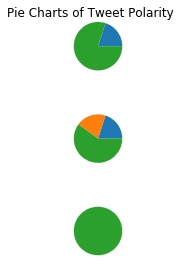

In [0]:
fig, ax = plt.subplots(3)

fig.suptitle("Pie Charts of Tweet Polarity")
fig.tight_layout()

ax[0].pie(df_pie["1-8/2017"])
ax[1].pie(df_pie["8-12/2017"])
ax[2].pie(df_pie["1-4/2018"])

plt.show()

([<matplotlib.patches.Wedge at 0x7f582f7a1a20>,
 [Text(0.8899186877588753, 0.6465637858537406, 'negative'),
  Text(0.33991867422268784, 1.0461621742897658, 'neutral'),
  Text(-0.8899186574910393, -0.6465638275138399, 'positive')])

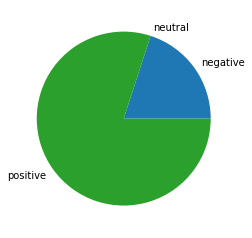

In [0]:
plt.pie(df_pie["1-8/2017"],labels=df_pie["index"])

([<matplotlib.patches.Wedge at 0x7f582f778a58>,
 [Text(0.8899186877588753, 0.6465637858537406, 'negative'),
  Text(-0.3399187231970732, 1.046162158377023, 'neutral'),
  Text(-0.3399185762739153, -1.046162206115244, 'positive')])

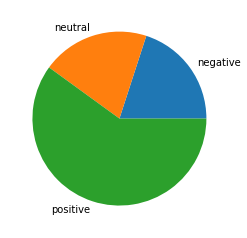

In [0]:
plt.pie(df_pie["8-12/2017"],labels=df_pie["index"])

([<matplotlib.patches.Wedge at 0x7f582f7dab38>,
 [Text(1.1, 0.0, 'negative'),
  Text(1.1, 0.0, 'neutral'),
  Text(-1.1, 1.3471114790620887e-16, 'positive')])

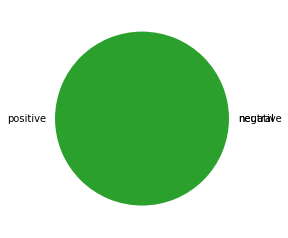

In [0]:
plt.pie(df_pie["1-4/2018"],labels=df_pie["index"])

#Wikipedia Scraping

I was initially going to use Twint to scrape for tweets by senators and evaluate a time series based on polarity of emotion in tweet. I have left this part in to display my web scraping capacity/ability to learn it.

In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [0]:
url = "https://en.wikipedia.org/wiki/List_of_current_United_States_senators"
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table', class_='sortable')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of current United States senators - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_current_United_States_senators","wgTitle":"List of current United States senators","wgCurRevisionId":920331462,"wgRevisionId":920331462,"wgArticleId":26701,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","CS1 errors: markup","Use mdy dates from September 2019","Articles with hCards","116th United States Congress","21st-century United States government officials","Lists of current office-holders in the United States","Lists of United States senators","Lists of current national legislators"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentMode

In [0]:
for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
print(len(headings[10:]))
headings[10:]

100


['Richard Shelby',
 'Doug Jones [d]',
 'Lisa Murkowski',
 'Dan Sullivan',
 'Kyrsten Sinema',
 'Martha McSally[e]',
 'John Boozman',
 'Tom Cotton',
 'Dianne Feinstein',
 'Kamala Harris',
 'Michael Bennet',
 'Cory Gardner',
 'Richard Blumenthal',
 'Chris Murphy',
 'Tom Carper',
 'Chris Coons',
 'Marco Rubio',
 'Rick Scott',
 'Johnny Isakson',
 'David Perdue',
 'Brian Schatz',
 'Mazie Hirono',
 'Mike Crapo',
 'Jim Risch',
 'Dick Durbin',
 'Tammy Duckworth',
 'Todd Young',
 'Mike Braun',
 'Chuck Grassley',
 'Joni Ernst',
 'Pat Roberts',
 'Jerry Moran',
 'Mitch McConnell',
 'Rand Paul',
 'Bill Cassidy',
 'John Kennedy',
 'Susan Collins',
 'Angus King',
 'Ben Cardin',
 'Chris Van Hollen',
 'Elizabeth Warren',
 'Ed Markey',
 'Debbie Stabenow',
 'Gary Peters',
 'Amy Klobuchar',
 'Tina Smith',
 'Roger Wicker',
 'Cindy Hyde-Smith',
 'Roy Blunt',
 'Josh Hawley',
 'Jon Tester',
 'Steve Daines',
 'Deb Fischer',
 'Ben Sasse',
 'Catherine Cortez Masto',
 'Jacky Rosen',
 'Jeanne Shaheen',
 'Maggie Has

#Senator Handles

I was initially going to use Twint to scrape for tweets by senators and evaluate a time series based on polarity of emotion in tweet. I have left this part in to display my web scraping capacity/ability to learn it.

In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [0]:
url = "https://www.socialseer.com/resources/us-senator-twitter-accounts/"
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')


print(soup.prettify())

URLError: ignored

In [0]:
My_table = soup.find('table',{'style':"width: 100%;"})
My_table
links = My_table.findAll("a")
print(len(links))
links


In [0]:
handles = []
for link in links:
  link = (link.get('href'))
  handles.append(link.replace('https://twitter.com/',""))

print(handles)